In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import networkx as nx
import hypernetx as hnx

In [22]:
ce_raw_data = pd.read_csv('DevoGraph/data/CE_raw_data.csv')
ce_raw_data = ce_raw_data.drop(columns=['Unnamed: 0'])

# normalize the coordinates
ce_raw_data['x'] = ce_raw_data['x'] - ce_raw_data['x'].mean()  # / max - min
ce_raw_data['y'] = ce_raw_data['y'] - ce_raw_data['y'].mean()
ce_raw_data['z'] = ce_raw_data['z'] - ce_raw_data['z'].mean()

In [23]:
data_path = 'DevoGraph/data/'
lineage_data = pd.read_excel(f'{data_path}cell-phenotype-lineage-data.xlsx', sheet_name='daughter-of-database',
                             engine='openpyxl', usecols=['CELL NAME', 'CELL NAME.1'])
lineage_data.rename(
    columns={'CELL NAME': 'cell', 'CELL NAME.1': 'mother'}, inplace=True)

In [24]:
lineage_data.head()

cell mother
0      AB     P0
1     ABa     AB
2    ABal    ABa
3   ABala   ABal
4  ABalaa  ABala

In [25]:
ce_raw_data.head()

cell  time           x          y         z  size
0   AB     1  113.254827  34.087484 -0.927981  53.0
1   AB     2  153.254827  -7.912516 -0.427981  68.0
2   AB     3  156.254827 -16.912516 -0.927981  48.0
3   AB     4  150.254827 -28.912516 -0.927981  50.0
4  ABa     5  178.254827  20.087484 -0.627981  70.0

In [26]:
ce_data = ce_raw_data.merge(lineage_data, how='inner', on='cell')

In [27]:
ce_data

cell  time           x          y         z  size mother
0          AB     1  113.254827  34.087484 -0.927981  53.0     P0
1          AB     2  153.254827  -7.912516 -0.427981  68.0     P0
2          AB     3  156.254827 -16.912516 -0.927981  48.0     P0
3          AB     4  150.254827 -28.912516 -0.927981  50.0     P0
4         ABa     5  178.254827  20.087484 -0.627981  70.0     AB
...       ...   ...         ...        ...       ...   ...    ...
250108   Cppp    87  237.254827 -46.912516 -0.827981  40.0    Cpp
250109   Cppp    88  242.254827 -36.912516 -0.927981  40.0    Cpp
250110   Cppp    89  232.254827 -41.912516 -1.827981  38.0    Cpp
250111  Cpppa    90  221.254827 -18.912516 -0.127981  36.0   Cppp
250112  Cpppa    91  229.254827 -13.912516  0.072019  36.0   Cppp

[250113 rows x 7 columns]

In [28]:
ce_data['time'].min(), ce_data['time'].max()

(np.int64(1), np.int64(190))

In [29]:
ce_data['time'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [30]:
threshold = 5
hypergraphs = {}
for time_point in range(1, 191, 10):
    sub_ce_data = ce_data[ce_data['time'] == time_point]
    positions = sub_ce_data[['x', 'y', 'z']].values
    nested_dict = {}

    # Group nodes by proximity
    for i in range(len(positions)):
        # Initialize with cell itself
        nested_dict[i] = [sub_ce_data.iloc[i]['cell']]
        for j in range(i + 1, len(positions)):
            if np.linalg.norm(positions[i] - positions[j]) < threshold:
                nested_dict[i].append(sub_ce_data.iloc[j]['cell'])
            
    H = hnx.Hypergraph(nested_dict)
    hypergraphs[time_point] = H
    

In [31]:
hypergraphs

{1: None hypernetx.classes.hypergraph.Hypergraph,
 11: None hypernetx.classes.hypergraph.Hypergraph,
 21: None hypernetx.classes.hypergraph.Hypergraph,
 31: None hypernetx.classes.hypergraph.Hypergraph,
 41: None hypernetx.classes.hypergraph.Hypergraph,
 51: None hypernetx.classes.hypergraph.Hypergraph,
 61: None hypernetx.classes.hypergraph.Hypergraph,
 71: None hypernetx.classes.hypergraph.Hypergraph,
 81: None hypernetx.classes.hypergraph.Hypergraph,
 91: None hypernetx.classes.hypergraph.Hypergraph,
 101: None hypernetx.classes.hypergraph.Hypergraph,
 111: None hypernetx.classes.hypergraph.Hypergraph,
 121: None hypernetx.classes.hypergraph.Hypergraph,
 131: None hypernetx.classes.hypergraph.Hypergraph,
 141: None hypernetx.classes.hypergraph.Hypergraph,
 151: None hypernetx.classes.hypergraph.Hypergraph,
 161: None hypernetx.classes.hypergraph.Hypergraph,
 171: None hypernetx.classes.hypergraph.Hypergraph,
 181: None hypernetx.classes.hypergraph.Hypergraph}

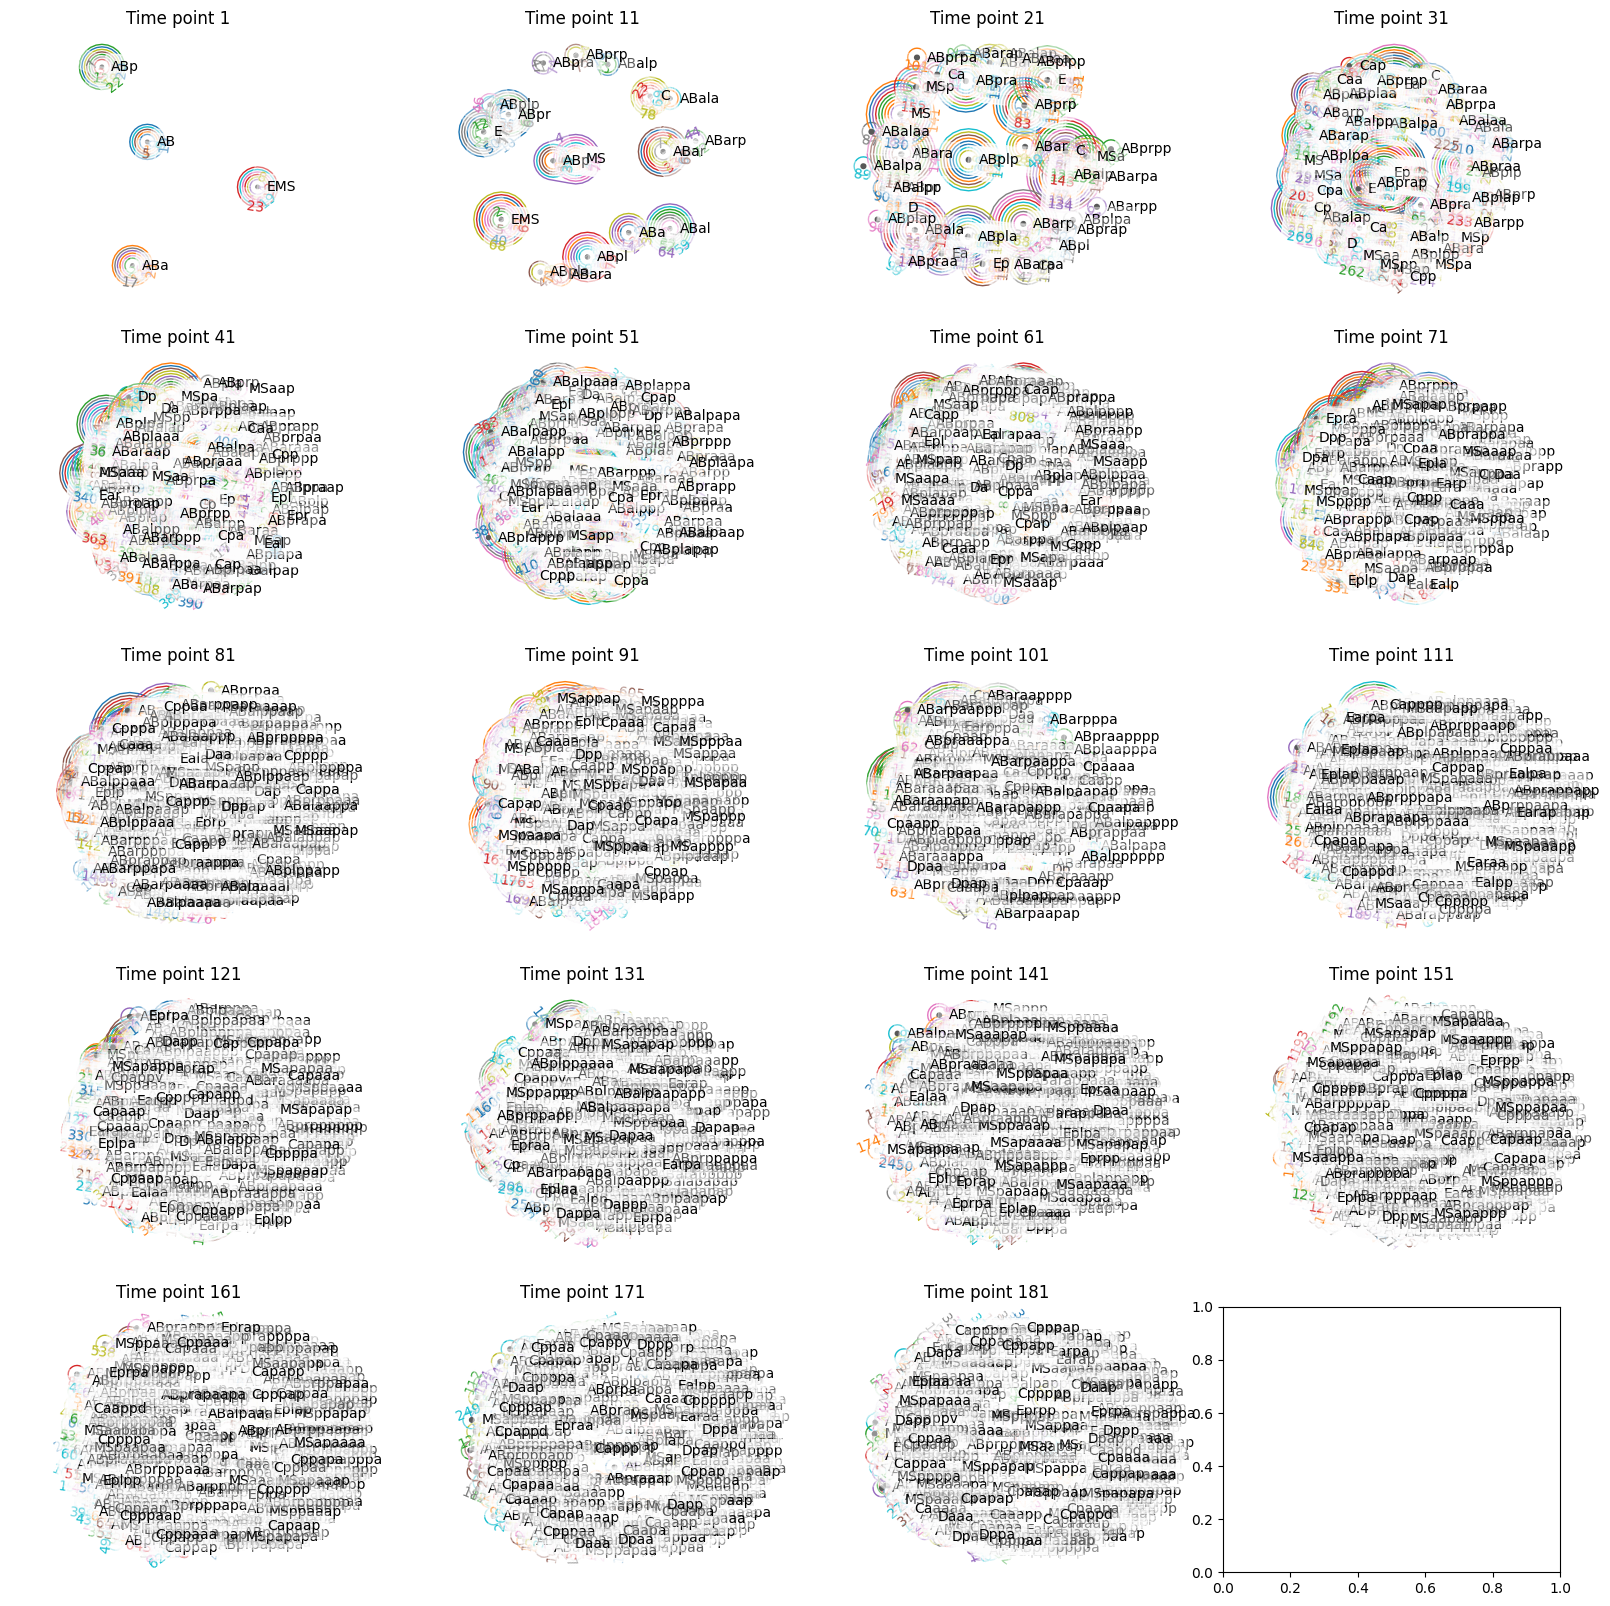

In [32]:
# draw the hypergraphs
fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    time_point = 1 + i * 10
    if time_point not in hypergraphs:
        continue
    hnx.draw(hypergraphs[time_point], ax=ax)
    ax.set_title(f'Time point {time_point}')

## Clusering based Hypergraphs

In [33]:


def create_hypergraph_DBSCAN(eps, min_samples, include_noise):
    '''
    Create a hypergraph from the cell positions using DBSCAN clustering

    Args:
    - eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
    - min_samples: The number of samples in a neighborhood for a point to be considered as a core point
    - include_noise: Whether to include noise points in the hypergraph as seperate hyperedges
    '''
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(positions)
    labels = clustering.labels_

    list_of_lists = []
    # Add nodes to hyperedges based on clusters
    count = 0
    for cluster_id in set(labels):
        count += 1
        if cluster_id != -1:  # Ignore noise points
            members = new_stats_df['cell'][labels == cluster_id].tolist()
            list_of_lists.append(members)
        elif include_noise:
            # add the noise points to the list
            members = new_stats_df['cell'][labels == cluster_id].tolist()
            list_of_lists.extend(members)

    H = hnx.Hypergraph(list_of_lists)
    return H

In [34]:
from sklearn.cluster import DBSCAN
import collections

eps, min_samples, include_noise = 5, 2, True # hyperparameters for DBSCAN
hypergraphs = {}
for time_point in range(1, 191, 10):
    sub_ce_data = ce_data[ce_data['time'] == time_point]
    positions = sub_ce_data[['x', 'y', 'z']].values
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(positions)
    labels = clustering.labels_

    list_of_lists = []
    # Add nodes to hyperedges based on clusters
    count = 0
    for cluster_id in set(labels):
        count += 1
        if cluster_id != -1:  # Ignore noise points
            members = sub_ce_data['cell'][labels == cluster_id].tolist()
            list_of_lists.append(members)
        elif include_noise:
            # add the noise points to the list
            members = sub_ce_data['cell'][labels == cluster_id].tolist()
            list_of_lists.extend(members)

    H = hnx.Hypergraph(list_of_lists)
    hypergraphs[time_point] = H
    break

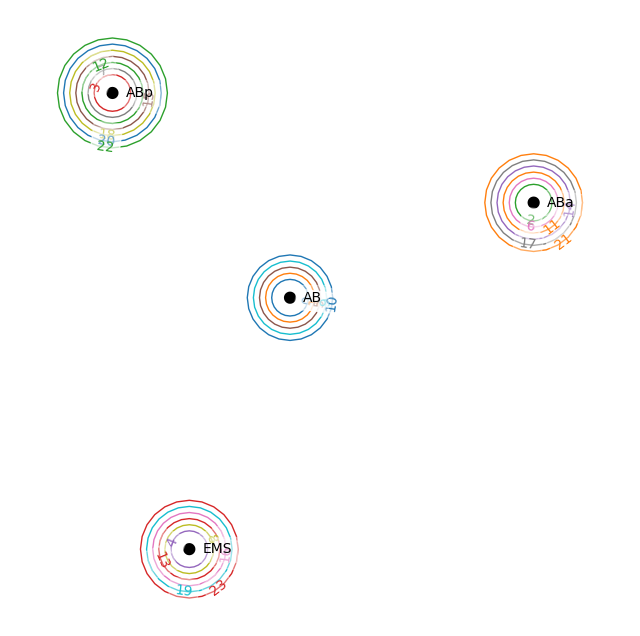

In [35]:
hypergraphs[1]
hnx.draw(hypergraphs[1])

The issue is for the same cell we are getting multi hyperedges.

In [36]:
for time_point in range(1, 191, 10):
    sub_ce_data = ce_data[ce_data['time'] == time_point]
    positions = sub_ce_data[['x', 'y', 'z']].values
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(positions)
    labels = clustering.labels_
    print("TIME POINT:", time_point)
    print(clustering)
    print()
    print("Number of cells:", len(sub_ce_data), "\n")
    print("Cells\n", list(sub_ce_data['cell']), "\n")
    print("Number of clusters: ", len(set(labels)) - (1 if -1 in labels else 0))
    print("Cluster indices:", labels, "\n")
    print("Note: Even the same cells have different posiitions and sizes.\n")
    print(sub_ce_data)


    break

TIME POINT: 1
DBSCAN(eps=5, min_samples=2)

Number of cells: 24 

Cells
 ['AB', 'AB', 'ABa', 'ABp', 'EMS', 'AB', 'ABa', 'ABp', 'EMS', 'AB', 'AB', 'ABa', 'ABp', 'EMS', 'ABa', 'ABp', 'EMS', 'ABa', 'ABp', 'EMS', 'ABp', 'ABa', 'ABp', 'EMS'] 

Number of clusters:  0
Cluster indices: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] 

Note: Even the same cells have different posiitions and sizes.

       cell  time           x           y         z  size mother
0        AB     1  113.254827   34.087484 -0.927981  53.0     P0
22241    AB     1  -55.745173  -41.912516  4.672019  82.0     P0
38976   ABa     1 -153.745173   36.087484 -0.127981  82.0     AB
44685   ABp     1   47.254827   88.087484 -0.427981  80.0     AB
50577   EMS     1   20.254827 -135.912516  0.872019  84.0  Psub1
55334    AB     1  -70.745173  -13.912516 -2.727981  88.0     P0
76923   ABa     1  130.254827   19.087484  4.272019  80.0     AB
83174   ABp     1   11.254827   86.087484  4.272019  80.0    

**Solution:** Group the same type of cells and avg their positions and sizes which are at the same time.

In [37]:
from sklearn.cluster import DBSCAN
import collections

eps, min_samples, include_noise = 5, 2, True  # hyperparameters for DBSCAN
hypergraphs = {}
for time_point in range(1, 191, 10):
    sub_ce_data = ce_data[ce_data['time'] == time_point]

    # combine the cells with the same name, avg the x, y, z, and the size columns, same mother column
    new_sub_ce_data = sub_ce_data.groupby('cell').agg(
        {'x': 'mean', 'y': 'mean', 'z': 'mean', 'size': 'mean', 'mother': 'first'}).reset_index()

    positions = new_sub_ce_data[['x', 'y', 'z']].values
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(positions)
    labels = clustering.labels_

    list_of_lists = []
    # Add nodes to hyperedges based on clusters
    count = 0
    for cluster_id in set(labels):
        count += 1
        if cluster_id != -1:  # Ignore noise points
            members = new_sub_ce_data['cell'][labels == cluster_id].tolist()
            list_of_lists.append(members)
        elif include_noise:
            # add the noise points to the list
            members = new_sub_ce_data['cell'][labels == cluster_id].tolist()
            list_of_lists.extend(members)

    H = hnx.Hypergraph(list_of_lists)
    hypergraphs[time_point] = H

python(70872) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


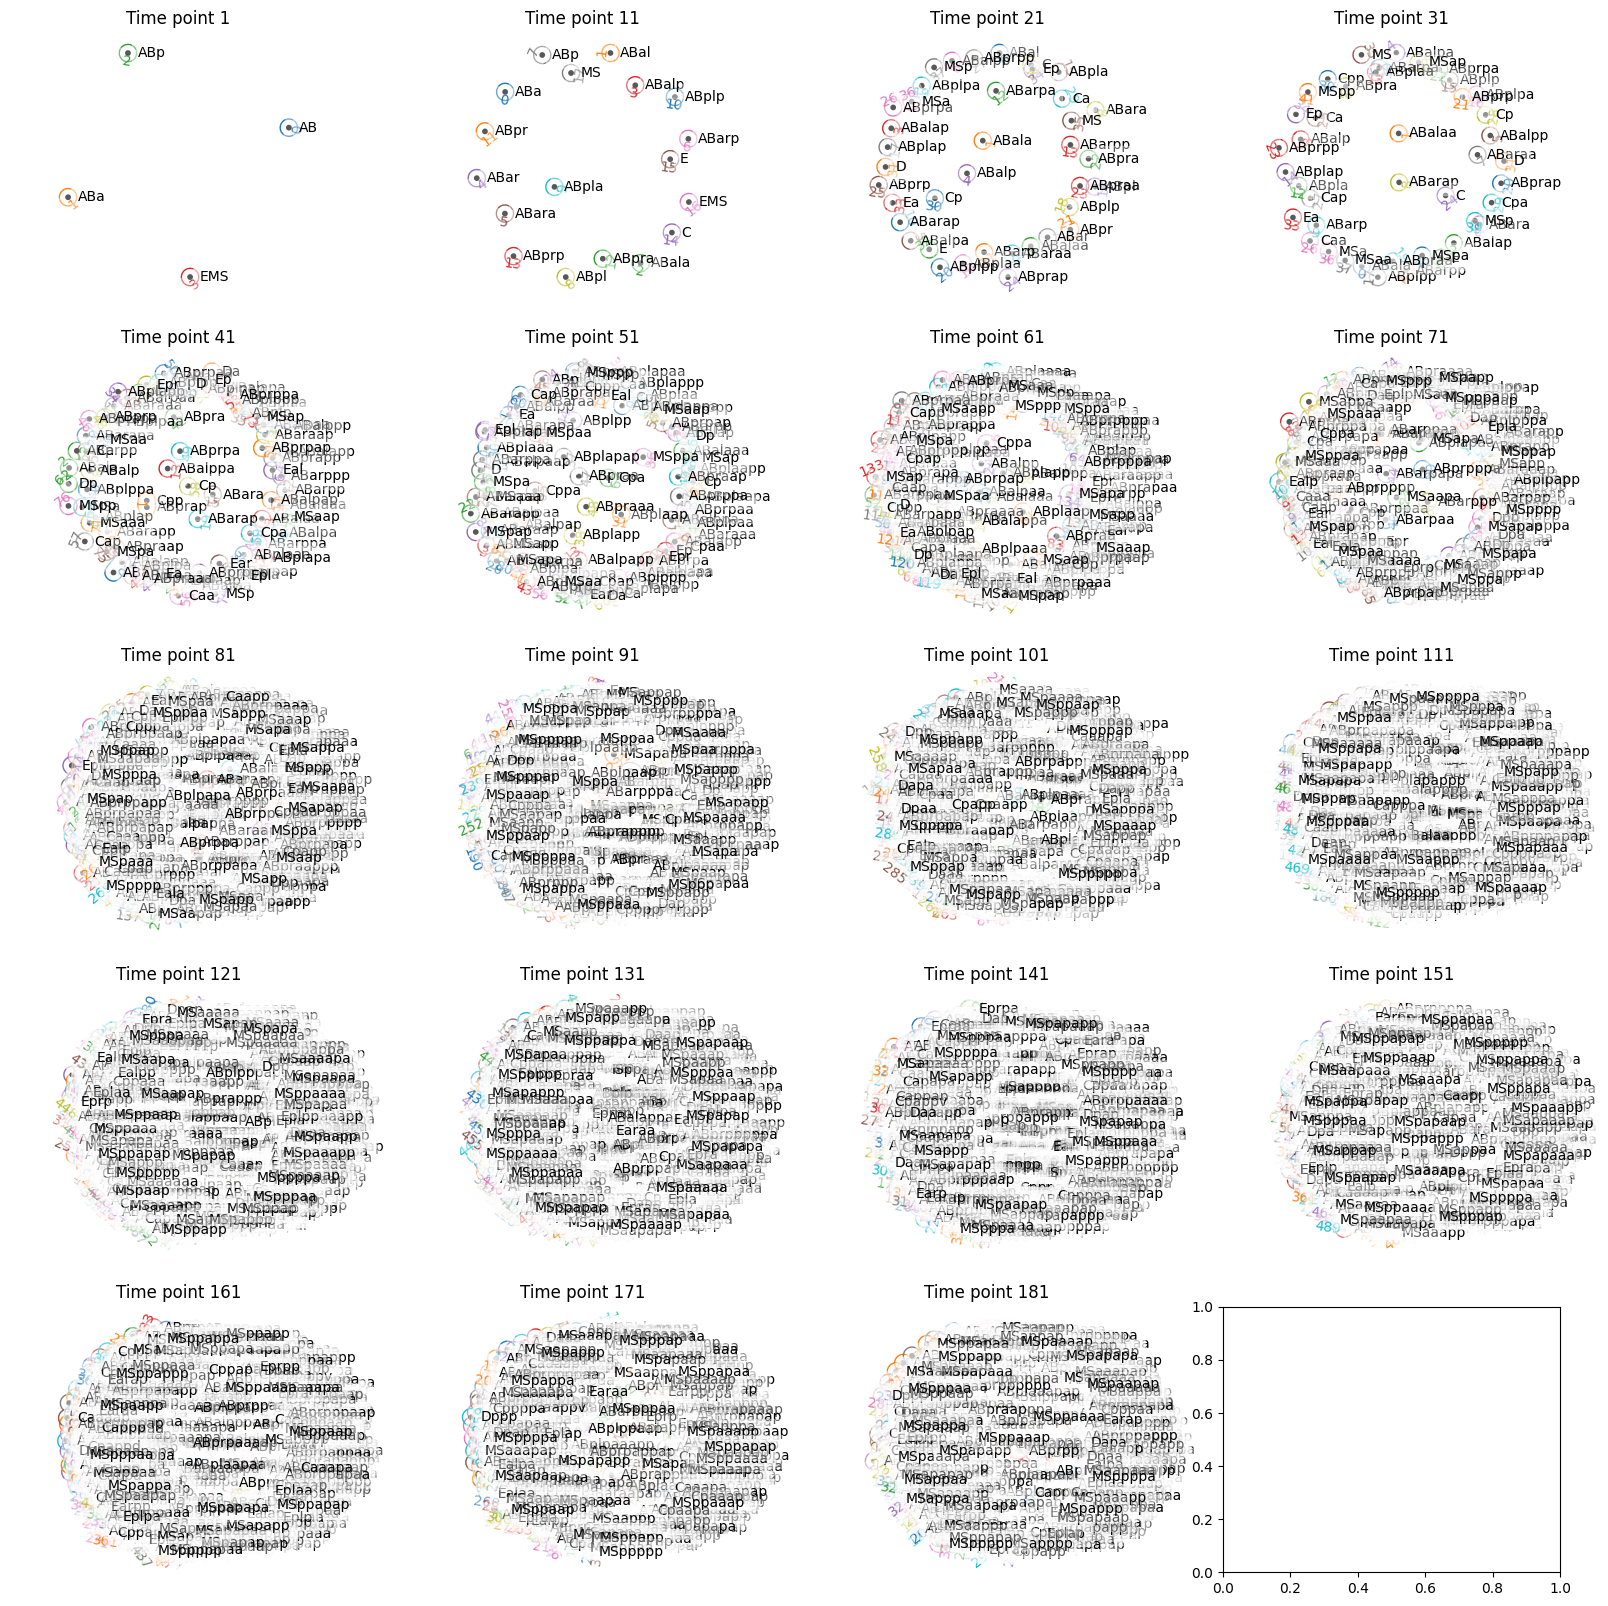

In [38]:
# draw the hypergraphs
fig, axs = plt.subplots(5, 4, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    time_point = 1 + i * 10
    if time_point not in hypergraphs:
        continue
    hnx.draw(hypergraphs[time_point], ax=ax)
    ax.set_title(f'Time point {time_point}')

## Plan:
1. View the incidence matrix or incidence_dict. View number of cells, density, aspect ratio, etc. using hnx.info_dict(H) (Basic Tut-1)
2. View degree, neigbours, etc. for nodes / hypernodes.
3. Build sub-hypergraphs (Restrict nodes or edges)
4. Find the centrality measures the graphs for every time point.
5. The weighted hyperedges are created based on how many times this hyperedge has appeared. (GOT - Advanced Tut-6)
6. Explore dual hypergraphs. Can they be useful? - Maybe useful in the Lineage Hypergraph.

### Doubt:
- Should we increase the size of the node based on the number of that kind of cell in the same time?